# Projeto de Educação - ENEM

---

## Introdução

O **Projeto de Educação - ENEM** tem como objetivo analisar os dados de resultados e participantes do **ENEM 2024**, com foco na compreensão do desempenho das escolas de uma determinada cidade. A partir dessa análise, busca-se identificar **padrões**, **gargalos estruturais** e **oportunidades de melhoria**, contribuindo para uma leitura mais profunda e orientada por dados sobre a qualidade educacional.

Para viabilizar essa análise, o projeto adota a **arquitetura Medallion**, um modelo de organização de dados amplamente utilizado em ambientes de *lakehouse*. Essa arquitetura promove uma evolução incremental da qualidade e do valor dos dados por meio das camadas **Bronze**, **Prata** e **Ouro**, permitindo maior controle, rastreabilidade e confiabilidade das informações ao longo do pipeline de dados.

Além da estruturação dos dados, o projeto contempla uma **análise exploratória**, utilizando visualizações gráficas para revelar *insights* relevantes. Esses gráficos auxiliam na identificação de comportamentos, discrepâncias e tendências, agregando valor à interpretação do produto final e apoiando tomadas de decisão baseadas em evidências.

A estrutura base do projeto foi desenvolvida a partir do curso **MasterClass - Criando um Produto de Dados**, ministrado pela **DataV**. As análises e interpretações apresentadas ao longo do código são resultado de reflexões construídas durante as aulas, enriquecidas tanto pelas experiências compartilhadas pelos professores quanto pelas contribuições dos participantes da turma ao vivo, o que teve papel fundamental no aprofundamento do aprendizado.

Adicionalmente, o projeto busca incorporar **fontes externas de pesquisa** que complementem a análise dos dados do ENEM. Acredita-se que o estudo desses dados é essencial para compreender a realidade educacional brasileira e subsidiar a formulação de **políticas públicas** mais eficazes, orientadas para a melhoria da educação.

Por fim, este é um projeto de **ciclo contínuo**. O que é apresentado aqui representa apenas o início de um conjunto muito mais amplo de possibilidades analíticas. Há ainda inúmeros caminhos a serem explorados, reforçando o caráter evolutivo e incremental deste trabalho.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow
import datetime
import warnings

warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Local da pasta
local = '/Git_Clones/projeto-de-educacao-enem/3_bronze/'

# Dados do projeto
base_resultado = 'RESULTADOS_2024.csv'
base_participantes = 'PARTICIPANTES_2024.csv'

## **0. Compressão dos arquivos**

Arquivos: CSV -> Parquet
- O Parquet é um formato colunar. Ao contrário do CSV (que armazena linha por linha), o Parquet armazena os dados por colunas.

In [3]:
# Marca o tempo inicial
inicio = datetime.datetime.now()

# Lendo o arquivo
df_resultado = pd.read_csv(local+base_resultado, encoding='latin1', sep=';')

# Marca o tempo final
fim = datetime.datetime.now()
tempo = fim - inicio
print(f'Tempo de leitura: {tempo.total_seconds():.2f} segundos')

Tempo de leitura: 75.60 segundos


In [4]:
# Marca o tempo inicial
inicio = datetime.datetime.now()

# Lendo o arquivo
df_participante = pd.read_csv(local+base_participantes, encoding='latin1', sep=';')

# Marca o tempo final
fim = datetime.datetime.now()
tempo = fim - inicio
print(f'Tempo de leitura: {tempo.total_seconds():.2f} segundos')

Tempo de leitura: 28.37 segundos


In [5]:
# Dimensão
df_resultado.shape

(4332944, 42)

In [ ]:
# Converter para parquet os dados
df_resultado.to_parquet(
    path=local+'df_resultado_parquet.parquet.gzip',
    compression='gzip',
    index=False
)

In [ ]:
df_participante.to_parquet(
    path=local+'df_participante_parquet.parquet.gzip',
    compression='gzip',
    index=False
)

## **1. Modelagem: Dados de Resultado**

In [8]:
# Marca o tempo inicial
inicio = datetime.datetime.now()

# Lendo o arquivo
arquivo_comprimido = 'df_resultado_parquet.parquet.gzip'
df_resultado = pd.read_parquet(local+arquivo_comprimido, engine='pyarrow')

# Marca o tempo final
fim = datetime.datetime.now()
tempo = fim - inicio
print(f'Tempo de leitura: {tempo.total_seconds():.2f} segundos')

Tempo de leitura: 21.81 segundos


In [12]:
df_resultado.iloc[0:3, 0:10]

,NU_SEQUENCIAL,NU_ANO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC
0,206403,2024,23052929.00,2301406.00,Aratuba,23.00,CE,2.00,1.00,1.00
1,3604651,2024,42103770.00,4218004.00,Tijucas,42.00,SC,4.00,1.00,1.00
2,1461268,2024,NaN,NaN,None,NaN,None,NaN,NaN,NaN


In [13]:
df_resultado.iloc[0:3, 10:20]

,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH
0,2301406,Aratuba,23,CE,1,1,1,1,1420.00,1383.00
1,4218004,Tijucas,42,SC,1,1,1,1,1422.00,1384.00
2,4122404,Rolândia,41,PR,1,1,1,1,1419.00,1385.00


In [14]:
df_resultado.iloc[0:3, 20:30]

,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT
0,1395.00,1408.00,436.80,377.80,423.40,427.10,CAABADDBBBACACACDEABDBABDDCCBACDCCBAACCABCBAC,BEABBCDABCDBAEEBDDABCCDAADDABACDDAB..........,BCADBCDCEDBDDBDDCDBCBB*BBDEAEEBCDCABBDDAAECEE,CBDCCADBBECCBADEACCBDCACECDDABBDBADBAAEDBCCAB
1,1396.00,1410.00,521.90,601.90,605.50,689.20,EBDEEADAECCAAEDBBEDABACDBCEEDDDEDBDDABDBCCECA,BADBACDAECEDEABBEADDBBDEBEDADEDEEACBBECABCEDA,AACEACADECBCDAEEBEDCBCBEDDCDEAEDEBDABDCECDDDB,DBAEDBECBDDBCCBBABBDECCCCEECBACCDBCDAAABBAAAD
2,1398.00,1407.00,363.00,548.40,557.20,456.40,CABAECDBADDCDEACABEACEABEDDCEDCDCCBDBDBDDBDCC,DAEDBCDCEBCCECADDACABDEBDCDECEDBEABECBCBBDBCD,BBCABCACDDEECCBCECECADEECCBEADBBEDBDDDEDDEECB,EBADBEDDDBCBCBCDCCECAAADDDECCDBDACACCEAEACDAC


In [15]:
df_resultado.iloc[0:3, 30:40]

,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4
0,1,CAEDAACCAEEXCBBAEDBBCAACDEDCBCEECAAEDDDEBBDDB,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,80.00,60.00,60.00,80.00
1,0,BBCEDBBAEXCCAEDDBCAEDAACAAEDDDEBBECBCEEDCAACD,DADABCDCECEDEBBBEBCDBADACBCADCEBEADBAECAECEDA,AACEADDDACDADECBBDBEEBDDECCBEDDCADBBDEBCEBDCEC...,DBCECEACADABBECBEDADCCDCCABBBCECEBCEADABBADDD,1.00,160.00,200.00,200.00,180.00
2,1,BCEAACDEDCAAEDDDEBBDDBECCAEDBBAAACCAEEXCBBCED,CAEDBADBEBCCEDADBAEACBCADCEDEBBEBACECEABCDDAD,EAAACDDCDADDCBDEECEECBDCDADEEBCBEBADBCEBDBDDDD...,ABBABBADDDBBCECEADCEBCCCDBADCBEDAECADACDBCECE,1.00,120.00,120.00,40.00,120.00


In [16]:
df_resultado.iloc[0:3, 40:50]

,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,20.00,300.00
1,180.00,920.00
2,80.00,480.00


Filtrar a cidade de Ribeirão Preto - SP

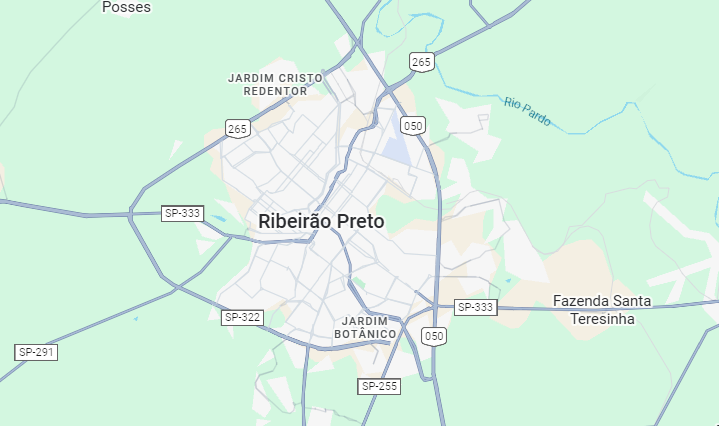

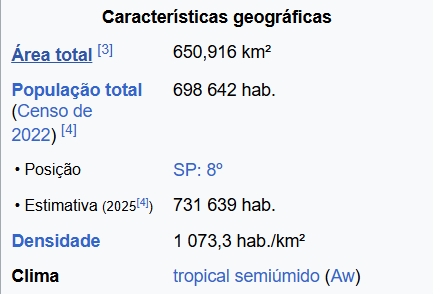

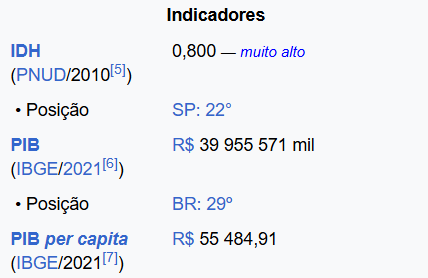

In [17]:
### ### ### ### ###
# Filtro Regional
### ### ### ### ###

# Setar parametros
estado = 'SP'
cidade = 'Ribeirão Preto'

filtro_cidade = (
    df_resultado
    .loc[
        (df_resultado['NO_MUNICIPIO_ESC'] == cidade) &
        (df_resultado['SG_UF_ESC'] == estado)
    ]
)

# Dimensão
df_resultado.shape, filtro_cidade.shape

((4332944, 42), (4164, 42))

In [18]:
# Verifcar
filtro_cidade.head()

,NU_SEQUENCIAL,NU_ANO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,...,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
431,2602908,2024,35114728.00,3543402.00,Ribeirão Preto,35.00,SP,4.00,1.00,1.00,...,ACBCADCEDBAECEDADBADBEBCDADABCDEABCAEDEBBCECE,AACEADACDDCBEDADEEBDDBDBBCEECBDCBADDDCBDEDDCEC...,CEBCEADBBCEADDDABBABBCCDCCECEDBACADECABEDADCB,1.00,160.00,180.00,160.00,160.00,160.00,820.00
866,3815886,2024,35024065.00,3543402.00,Ribeirão Preto,35.00,SP,2.00,1.00,1.00,...,CAEDBADBEBCCEDADBAEACBCADCEDEBBEBACECEABCDDAD,EAAACDDCDADDCBDEECEECBDCDADEEBCBEBADBCEBDBDDDD...,ABBABBADDDBBCECEADCEBCCCDBADCBEDAECADACDBCECE,1.00,120.00,200.00,140.00,120.00,160.00,740.00
1705,2900559,2024,35024119.00,3543402.00,Ribeirão Preto,35.00,SP,2.00,1.00,1.00,...,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,120.00,160.00,140.00,160.00,120.00,700.00
2533,2543851,2024,35114832.00,3543402.00,Ribeirão Preto,35.00,SP,4.00,1.00,1.00,...,DADABCDCECEDEBBBEBCDBADACBCADCEBEADBAECAECEDA,AACEADDDACDADECBBDBEEBDDECCBEDDCADBBDEBCEBDCEC...,DBCECEACADABBECBEDADCCDCCABBBCECEBCEADABBADDD,1.00,160.00,180.00,180.00,160.00,160.00,840.00
2562,683130,2024,35047466.00,3543402.00,Ribeirão Preto,35.00,SP,2.00,1.00,1.00,...,DADABCDCECEDEBBBEBCDBADACBCADCEBEADBAECAECEDA,AACEADDDACDADECBBDBEEBDDECCBEDDCADBBDEBCEBDCEC...,DBCECEACADABBECBEDADCCDCCABBBCECEBCEADABBADDD,1.00,140.00,200.00,160.00,160.00,160.00,820.00


In [19]:
# Corrigir o index
filtro_cidade.reset_index(drop=True, inplace=True)
filtro_cidade.head()

,NU_SEQUENCIAL,NU_ANO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,...,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,2602908,2024,35114728.00,3543402.00,Ribeirão Preto,35.00,SP,4.00,1.00,1.00,...,ACBCADCEDBAECEDADBADBEBCDADABCDEABCAEDEBBCECE,AACEADACDDCBEDADEEBDDBDBBCEECBDCBADDDCBDEDDCEC...,CEBCEADBBCEADDDABBABBCCDCCECEDBACADECABEDADCB,1.00,160.00,180.00,160.00,160.00,160.00,820.00
1,3815886,2024,35024065.00,3543402.00,Ribeirão Preto,35.00,SP,2.00,1.00,1.00,...,CAEDBADBEBCCEDADBAEACBCADCEDEBBEBACECEABCDDAD,EAAACDDCDADDCBDEECEECBDCDADEEBCBEBADBCEBDBDDDD...,ABBABBADDDBBCECEADCEBCCCDBADCBEDAECADACDBCECE,1.00,120.00,200.00,140.00,120.00,160.00,740.00
2,2900559,2024,35024119.00,3543402.00,Ribeirão Preto,35.00,SP,2.00,1.00,1.00,...,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,120.00,160.00,140.00,160.00,120.00,700.00
3,2543851,2024,35114832.00,3543402.00,Ribeirão Preto,35.00,SP,4.00,1.00,1.00,...,DADABCDCECEDEBBBEBCDBADACBCADCEBEADBAECAECEDA,AACEADDDACDADECBBDBEEBDDECCBEDDCADBBDEBCEBDCEC...,DBCECEACADABBECBEDADCCDCCABBBCECEBCEADABBADDD,1.00,160.00,180.00,180.00,160.00,160.00,840.00
4,683130,2024,35047466.00,3543402.00,Ribeirão Preto,35.00,SP,2.00,1.00,1.00,...,DADABCDCECEDEBBBEBCDBADACBCADCEBEADBAECAECEDA,AACEADDDACDADECBBDBEEBDDECCBEDDCADBBDEBCEBDCEC...,DBCECEACADABBECBEDADCCDCCABBBCECEBCEADABBADDD,1.00,140.00,200.00,160.00,160.00,160.00,820.00


In [20]:
# Verifico campos nulos
filtro_cidade.isnull().sum() / filtro_cidade.shape[0] * 100

NU_SEQUENCIAL             0.00
NU_ANO                    0.00
CO_ESCOLA                 0.00
CO_MUNICIPIO_ESC          0.00
NO_MUNICIPIO_ESC          0.00
CO_UF_ESC                 0.00
SG_UF_ESC                 0.00
TP_DEPENDENCIA_ADM_ESC    0.00
TP_LOCALIZACAO_ESC        0.00
TP_SIT_FUNC_ESC           0.00
CO_MUNICIPIO_PROVA        0.00
NO_MUNICIPIO_PROVA        0.00
CO_UF_PROVA               0.00
SG_UF_PROVA               0.00
TP_PRESENCA_CN            0.00
TP_PRESENCA_CH            0.00
TP_PRESENCA_LC            0.00
TP_PRESENCA_MT            0.00
CO_PROVA_CN              15.80
CO_PROVA_CH              13.33
CO_PROVA_LC              13.33
CO_PROVA_MT              15.80
NU_NOTA_CN               15.80
NU_NOTA_CH               13.33
NU_NOTA_LC               13.33
NU_NOTA_MT               15.80
TX_RESPOSTAS_CN          15.80
TX_RESPOSTAS_CH          13.33
TX_RESPOSTAS_LC          13.33
TX_RESPOSTAS_MT          15.80
TP_LINGUA                 0.00
TX_GABARITO_CN           15.80
TX_GABAR

In [21]:
# Campos unicos
filtro_cidade.nunique()

NU_SEQUENCIAL             4164
NU_ANO                       1
CO_ESCOLA                   77
CO_MUNICIPIO_ESC             1
NO_MUNICIPIO_ESC             1
CO_UF_ESC                    1
SG_UF_ESC                    1
TP_DEPENDENCIA_ADM_ESC       2
TP_LOCALIZACAO_ESC           1
TP_SIT_FUNC_ESC              1
CO_MUNICIPIO_PROVA          31
NO_MUNICIPIO_PROVA          31
CO_UF_PROVA                  6
SG_UF_PROVA                  6
TP_PRESENCA_CN               3
TP_PRESENCA_CH               3
TP_PRESENCA_LC               3
TP_PRESENCA_MT               3
CO_PROVA_CN                  7
CO_PROVA_CH                  7
CO_PROVA_LC                  7
CO_PROVA_MT                  7
NU_NOTA_CN                2132
NU_NOTA_CH                2178
NU_NOTA_LC                1762
NU_NOTA_MT                2371
TX_RESPOSTAS_CN           3506
TX_RESPOSTAS_CH           3606
TX_RESPOSTAS_LC           3609
TX_RESPOSTAS_MT           3506
TP_LINGUA                    2
TX_GABARITO_CN               5
TX_GABAR

In [22]:
# Tipos dos campos
filtro_cidade.dtypes.value_counts()

float64    21
object     12
int64       9
Name: count, dtype: int64

In [23]:
filtro_cidade.iloc[0:5, 0:10]

,NU_SEQUENCIAL,NU_ANO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC
0,2602908,2024,35114728.00,3543402.00,Ribeirão Preto,35.00,SP,4.00,1.00,1.00
1,3815886,2024,35024065.00,3543402.00,Ribeirão Preto,35.00,SP,2.00,1.00,1.00
2,2900559,2024,35024119.00,3543402.00,Ribeirão Preto,35.00,SP,2.00,1.00,1.00
3,2543851,2024,35114832.00,3543402.00,Ribeirão Preto,35.00,SP,4.00,1.00,1.00
4,683130,2024,35047466.00,3543402.00,Ribeirão Preto,35.00,SP,2.00,1.00,1.00


In [24]:
# Redifir nome das colunas
filtro_cidade.columns = [Loop.lower() for Loop in filtro_cidade.columns]
filtro_cidade.columns

Index(['nu_sequencial', 'nu_ano', 'co_escola', 'co_municipio_esc',
       'no_municipio_esc', 'co_uf_esc', 'sg_uf_esc', 'tp_dependencia_adm_esc',
       'tp_localizacao_esc', 'tp_sit_func_esc', 'co_municipio_prova',
       'no_municipio_prova', 'co_uf_prova', 'sg_uf_prova', 'tp_presenca_cn',
       'tp_presenca_ch', 'tp_presenca_lc', 'tp_presenca_mt', 'co_prova_cn',
       'co_prova_ch', 'co_prova_lc', 'co_prova_mt', 'nu_nota_cn', 'nu_nota_ch',
       'nu_nota_lc', 'nu_nota_mt', 'tx_respostas_cn', 'tx_respostas_ch',
       'tx_respostas_lc', 'tx_respostas_mt', 'tp_lingua', 'tx_gabarito_cn',
       'tx_gabarito_ch', 'tx_gabarito_lc', 'tx_gabarito_mt',
       'tp_status_redacao', 'nu_nota_comp1', 'nu_nota_comp2', 'nu_nota_comp3',
       'nu_nota_comp4', 'nu_nota_comp5', 'nu_nota_redacao'],
      dtype='object')

In [25]:
# De para
dicionario_adm_escola = {
    1:'Federal',
    2:'Estadual',
    3:'Municipal',
    4:'Privada'
}

dicionario_localizacao_escola = {
    1:'Urbana',
    2:'Rural'
}

dicionario_status_redacao = {
    1:'1_sem_problemas',
    2:'2_anulada',
    3:'3_copia_texto_motivador',
    4:'4_em_branco',
    6:'5_fuga_ao_tema',
    7:'6_nao_atendimento_ao_tipo_textual',
    8:'7_texto_insuficiente',
    9:'8_parte_desconectada',
}

# Aplicar as transformações
filtro_cidade['tipo_adm_escola'] = filtro_cidade.tp_dependencia_adm_esc.map(dicionario_adm_escola)
filtro_cidade['tipo_local_escola'] = filtro_cidade.tp_localizacao_esc.map(dicionario_localizacao_escola)
filtro_cidade['status_redacao'] = filtro_cidade.tp_status_redacao.map(dicionario_status_redacao)

# Transformando Idioma escolhido
filtro_cidade['idiona_estrageiro'] = np.where(filtro_cidade.tp_lingua == 0, 'Inglês', 'Espanhol')

filtro_cidade.iloc[0:5, -5:]

,nu_nota_redacao,tipo_adm_escola,tipo_local_escola,status_redacao,idiona_estrageiro
0,820.00,Privada,Urbana,1_sem_problemas,Inglês
1,740.00,Estadual,Urbana,1_sem_problemas,Inglês
2,700.00,Estadual,Urbana,1_sem_problemas,Espanhol
3,840.00,Privada,Urbana,1_sem_problemas,Inglês
4,820.00,Estadual,Urbana,1_sem_problemas,Inglês


In [26]:
filtro_cidade.tipo_adm_escola.value_counts()

tipo_adm_escola
Estadual    2176
Privada     1988
Name: count, dtype: int64

In [27]:
filtro_cidade.tipo_local_escola.value_counts()

tipo_local_escola
Urbana    4164
Name: count, dtype: int64

In [28]:
filtro_cidade.status_redacao.value_counts().sort_index()

status_redacao
1_sem_problemas            3527
3_copia_texto_motivador      10
4_em_branco                  48
5_fuga_ao_tema               16
7_texto_insuficiente          7
8_parte_desconectada          1
Name: count, dtype: int64

In [29]:
filtro_cidade.columns

Index(['nu_sequencial', 'nu_ano', 'co_escola', 'co_municipio_esc',
       'no_municipio_esc', 'co_uf_esc', 'sg_uf_esc', 'tp_dependencia_adm_esc',
       'tp_localizacao_esc', 'tp_sit_func_esc', 'co_municipio_prova',
       'no_municipio_prova', 'co_uf_prova', 'sg_uf_prova', 'tp_presenca_cn',
       'tp_presenca_ch', 'tp_presenca_lc', 'tp_presenca_mt', 'co_prova_cn',
       'co_prova_ch', 'co_prova_lc', 'co_prova_mt', 'nu_nota_cn', 'nu_nota_ch',
       'nu_nota_lc', 'nu_nota_mt', 'tx_respostas_cn', 'tx_respostas_ch',
       'tx_respostas_lc', 'tx_respostas_mt', 'tp_lingua', 'tx_gabarito_cn',
       'tx_gabarito_ch', 'tx_gabarito_lc', 'tx_gabarito_mt',
       'tp_status_redacao', 'nu_nota_comp1', 'nu_nota_comp2', 'nu_nota_comp3',
       'nu_nota_comp4', 'nu_nota_comp5', 'nu_nota_redacao', 'tipo_adm_escola',
       'tipo_local_escola', 'status_redacao', 'idiona_estrageiro'],
      dtype='object')

In [30]:
filtro_cidade.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nu_sequencial,4164.00,1983912.78,1122674.23,947.00,1068496.75,2033667.00,2873515.75,4317222.00
nu_ano,4164.00,2024.00,0.00,2024.00,2024.00,2024.00,2024.00,2024.00
co_escola,4164.00,35348107.00,1972091.68,35007868.00,35024107.00,35114832.00,35186429.00,60021257.00
co_municipio_esc,4164.00,3543402.00,0.00,3543402.00,3543402.00,3543402.00,3543402.00,3543402.00
co_uf_esc,4164.00,35.00,0.00,35.00,35.00,35.00,35.00,35.00
tp_dependencia_adm_esc,4164.00,2.95,1.00,2.00,2.00,2.00,4.00,4.00
tp_localizacao_esc,4164.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
tp_sit_func_esc,4164.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
co_municipio_prova,4164.00,3542498.22,42688.61,1600303.00,3543402.00,3543402.00,3543402.00,5002704.00
co_uf_prova,4164.00,34.99,0.42,16.00,35.00,35.00,35.00,50.00


In [31]:
filtro_cidade.idiona_estrageiro.value_counts( normalize=True ) * 100

idiona_estrageiro
Inglês     78.94
Espanhol   21.06
Name: proportion, dtype: float64

In [32]:
filtro_cidade.iloc[0:10, 40:50]

,nu_nota_comp5,nu_nota_redacao,tipo_adm_escola,tipo_local_escola,status_redacao,idiona_estrageiro
0,160.00,820.00,Privada,Urbana,1_sem_problemas,Inglês
1,160.00,740.00,Estadual,Urbana,1_sem_problemas,Inglês
2,120.00,700.00,Estadual,Urbana,1_sem_problemas,Espanhol
3,160.00,840.00,Privada,Urbana,1_sem_problemas,Inglês
4,160.00,820.00,Estadual,Urbana,1_sem_problemas,Inglês
5,160.00,760.00,Privada,Urbana,1_sem_problemas,Inglês
6,100.00,620.00,Privada,Urbana,1_sem_problemas,Espanhol
7,120.00,540.00,Estadual,Urbana,1_sem_problemas,Inglês
8,60.00,360.00,Estadual,Urbana,1_sem_problemas,Inglês
9,120.00,620.00,Estadual,Urbana,1_sem_problemas,Inglês


In [33]:
# Seprar o DataSet
colunas_notas = ['nu_nota_cn', 'nu_nota_ch', 'nu_nota_lc', 'nu_nota_mt', 'nu_nota_redacao']
colunas_presenca = ['tp_presenca_cn', 'tp_presenca_ch', 'tp_presenca_lc', 'tp_presenca_mt', 'status_redacao']
colunas_categoricas = ['no_municipio_esc', 'sg_uf_esc', 'tipo_adm_escola','tipo_local_escola', 'idiona_estrageiro']

# Setar
colunas_para_filtrar = colunas_categoricas + colunas_presenca + colunas_notas
filtro_cidade[colunas_para_filtrar]

,no_municipio_esc,sg_uf_esc,tipo_adm_escola,tipo_local_escola,idiona_estrageiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao
0,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,512.90,562.30,565.30,484.90,820.00
1,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,520.90,575.60,556.90,500.30,740.00
2,Ribeirão Preto,SP,Estadual,Urbana,Espanhol,1,1,1,1,1_sem_problemas,544.50,538.10,544.10,664.50,700.00
3,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,589.30,602.80,593.70,640.40,840.00
4,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,550.80,600.20,585.10,576.00,820.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,Ribeirão Preto,SP,Estadual,Urbana,Espanhol,1,1,1,1,1_sem_problemas,591.50,637.50,641.30,615.50,680.00
4160,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,619.70,594.30,651.80,800.40,840.00
4161,Ribeirão Preto,SP,Privada,Urbana,Espanhol,1,1,1,1,1_sem_problemas,497.00,506.70,567.80,607.60,660.00
4162,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,579.10,570.90,568.80,568.80,760.00


In [35]:
# Exportar para o Prata
local_exportar_prata = local.replace('3_bronze', '2_prata')

filtro_cidade[colunas_para_filtrar].to_parquet(
    path=local_exportar_prata+'dados_ribeirao_preto_notas.parquet.gzip',
    compression='gzip',
    index=False
)

In [36]:
local_exportar_prata

'/Git_Clones/projeto-de-educacao-enem/2_prata/'

## **2.EDA: Insights**

In [37]:
# Configurações estéticas
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

In [44]:
# Local da pasta
df_modelado = pd.read_parquet( local_exportar_prata+'dados_ribeirao_preto_notas.parquet.gzip' )
df_modelado.head()

,no_municipio_esc,sg_uf_esc,tipo_adm_escola,tipo_local_escola,idiona_estrageiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao
0,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,512.90,562.30,565.30,484.90,820.00
1,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,520.90,575.60,556.90,500.30,740.00
2,Ribeirão Preto,SP,Estadual,Urbana,Espanhol,1,1,1,1,1_sem_problemas,544.50,538.10,544.10,664.50,700.00
3,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,589.30,602.80,593.70,640.40,840.00
4,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,550.80,600.20,585.10,576.00,820.00


In [45]:
df_modelado.shape

(4164, 15)

In [46]:
df_modelado.describe( include='all' ).transpose().fillna('')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_municipio_esc,4164.00,1,Ribeirão Preto,4164,,,,,,,
sg_uf_esc,4164.00,1,SP,4164,,,,,,,
tipo_adm_escola,4164.00,2,Estadual,2176,,,,,,,
tipo_local_escola,4164.00,1,Urbana,4164,,,,,,,
idiona_estrageiro,4164.00,2,Inglês,3287,,,,,,,
tp_presenca_cn,4164.00,,,,0.84,0.37,0.00,1.00,1.00,1.00,2.00
tp_presenca_ch,4164.00,,,,0.87,0.34,0.00,1.00,1.00,1.00,2.00
tp_presenca_lc,4164.00,,,,0.87,0.34,0.00,1.00,1.00,1.00,2.00
tp_presenca_mt,4164.00,,,,0.84,0.37,0.00,1.00,1.00,1.00,2.00
status_redacao,3609.00,6,1_sem_problemas,3527,,,,,,,


In [47]:
# Colunas com a Data
colunas_notas = ['nu_nota_cn', 'nu_nota_ch', 'nu_nota_lc', 'nu_nota_mt', 'nu_nota_redacao']
colunas_presenca = ['tp_presenca_cn', 'tp_presenca_ch', 'tp_presenca_lc', 'tp_presenca_mt']

In [48]:
df_modelado.tp_presenca_cn.value_counts(normalize=True) * 100

tp_presenca_cn
1   84.20
0   15.71
2    0.10
Name: proportion, dtype: float64

In [49]:
colunas_presenca

['tp_presenca_cn', 'tp_presenca_ch', 'tp_presenca_lc', 'tp_presenca_mt']

In [50]:
# Indice de presença da prova

'''
0 -	Faltou à prova
1	- Presente na prova
2	- Eliminado na prova
'''

# Criar dicionário com os value_counts de cada prova
tabela_presenca = {}

for coluna in colunas_presenca:
    proporsao = df_modelado[coluna].value_counts(normalize=True)
    tabela_presenca[coluna] = proporsao

# Converter para DataFrame
tabela_presenca = pd.DataFrame(tabela_presenca).fillna(0)
tabela_presenca

,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt
1,0.84,0.87,0.87,0.84
0,0.16,0.13,0.13,0.16
2,0.00,0.00,0.00,0.00


In [51]:
# Média geral de presenca
(tabela_presenca.mean(axis=1) * 100)

1   85.43
0   14.41
2    0.16
dtype: float64

In [52]:
# Analise das Notas
analise_notas = (
    df_modelado[colunas_notas]
    .melt(var_name='prova', value_name='nota')
)

In [53]:
analise_notas.head()

,prova,nota
0,nu_nota_cn,512.90
1,nu_nota_cn,520.90
2,nu_nota_cn,544.50
3,nu_nota_cn,589.30
4,nu_nota_cn,550.80


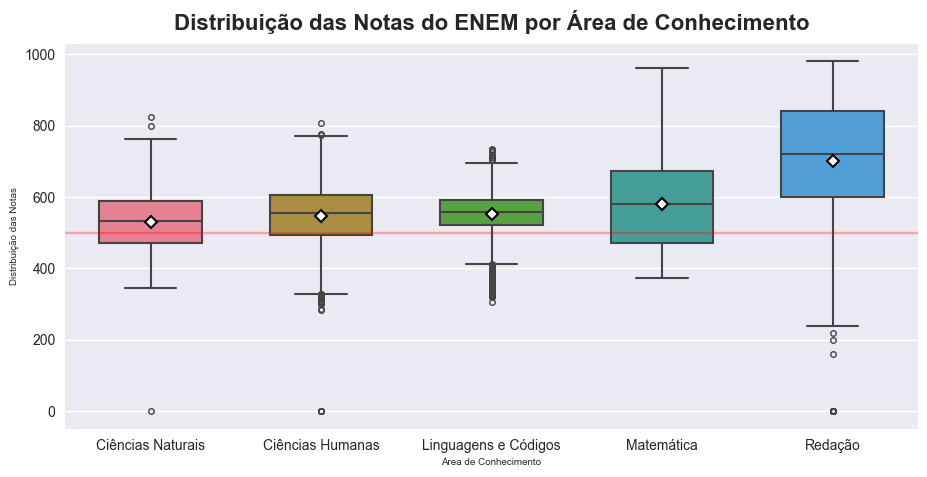

In [54]:
# Ajustar nomenclatura das provas
nomes_provas = {
    'nu_nota_cn': 'Ciências Naturais',
    'nu_nota_ch': 'Ciências Humanas',
    'nu_nota_lc': 'Linguagens e Códigos',
    'nu_nota_mt': 'Matemática',
    'nu_nota_redacao': 'Redação'
}
analise_notas['prova'] = analise_notas['prova'].map(nomes_provas)

# ordenar o boxplot
order_boxplot = (
    analise_notas
    .groupby(by='prova')
    .agg( mediana=('nota', 'median') )
    .sort_values(by='mediana')
    .index
)

# Plot
plt.figure( figsize=(11, 5) )
plt.title('Distribuição das Notas do ENEM por Área de Conhecimento', fontsize=16, fontweight='bold', pad=10)

sns.boxplot(
    data=analise_notas,
    x='prova',
    y='nota',
    width=0.6,
    linewidth=1.5,
    fliersize=4,
    hue='prova',
    legend=False,
    order=order_boxplot,
    showmeans=True,
    meanprops={
        'marker': 'D',
        'markerfacecolor': 'white',
        'markeredgecolor': 'black',
        'markersize': '6',
        'markeredgewidth': 1.5
    }

)

# Adicionar linhas de referência
plt.axhline(y=500, color='red', linestyle='-', alpha=0.3, label='Nota 500')

# Labels
plt.ylabel('Distribuição das Notas', size=7)
plt.xlabel('Área de Conhecimento', size=7)

In [55]:
(
    analise_notas
    .groupby(by='prova')
    .agg( mediana=('nota', 'median') )
    .sort_values(by='mediana')
    .index
)

Index(['Ciências Naturais', 'Ciências Humanas', 'Linguagens e Códigos',
       'Matemática', 'Redação'],
      dtype='object', name='prova')

In [56]:
# Transformação de variáveis quantitativas para categóricas
pd.qcut(
    df_modelado.nu_nota_cn,
    q=4,
    labels=['Q1', 'Q2', 'Q3', 'Q4']
).value_counts()

nu_nota_cn
Q1    878
Q2    877
Q4    876
Q3    875
Name: count, dtype: int64

In [57]:
# Adicionar ao DF os quartils
for coluna in colunas_notas:
  df_modelado[coluna+'_quartil'] = pd.qcut(
    df_modelado[coluna],
    q=10,
    #labels=['Q1', 'Q2', 'Q3', 'Q4']
    labels=[ 'Q'+str(loop) for loop in range(1, 11) ]
)

df_modelado.sample(5)

,no_municipio_esc,sg_uf_esc,tipo_adm_escola,tipo_local_escola,idiona_estrageiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao,nu_nota_cn_quartil,nu_nota_ch_quartil,nu_nota_lc_quartil,nu_nota_mt_quartil,nu_nota_redacao_quartil
791,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,565.30,620.70,565.90,689.90,920.00,Q7,Q9,Q6,Q8,Q10
3014,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,660.40,653.40,562.70,680.60,880.00,Q10,Q9,Q6,Q8,Q9
4010,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,576.50,578.10,563.90,696.70,680.00,Q8,Q7,Q6,Q9,Q5
321,Ribeirão Preto,SP,Estadual,Urbana,Espanhol,1,1,1,1,1_sem_problemas,411.50,446.30,488.80,474.00,640.00,Q1,Q2,Q2,Q3,Q4
3675,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,689.00,688.90,731.90,781.90,880.00,Q10,Q10,Q10,Q10,Q9


In [58]:
(
    df_modelado
    .groupby(['nu_nota_cn_quartil', 'nu_nota_mt_quartil'])
    .size()
    .unstack()
)

nu_nota_mt_quartil,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
nu_nota_cn_quartil,,,,,,,,,,
Q1,108,70,66,47,33,16,7,2,1,1
Q2,79,72,63,52,41,19,8,14,3,1
Q3,67,59,57,50,45,32,29,6,4,0
Q4,43,56,55,54,61,38,32,11,3,1
Q5,29,38,42,52,51,56,33,35,9,4
Q6,18,31,32,45,47,58,43,54,18,3
Q7,8,13,21,28,34,66,67,66,39,8
Q8,2,8,6,14,29,46,77,71,80,19
Q9,0,3,5,8,7,14,37,79,111,85


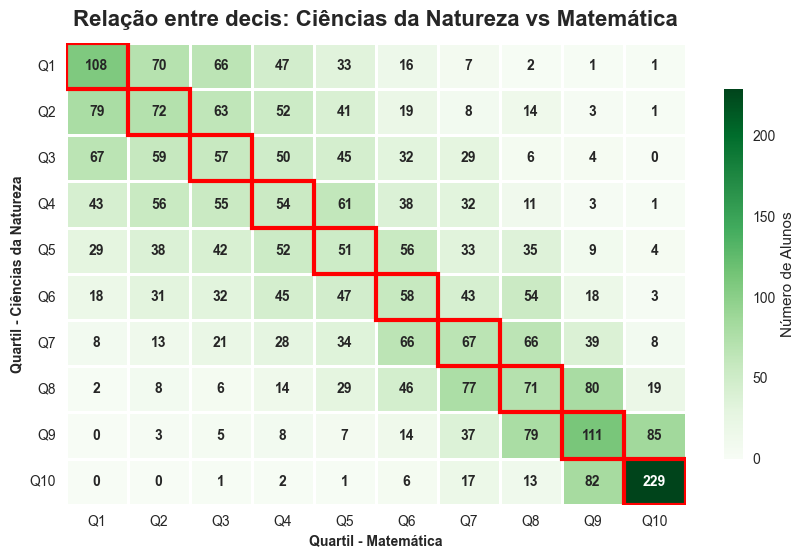

In [59]:
# Preparar os dados
movimento = (
    df_modelado
    .groupby(['nu_nota_cn_quartil', 'nu_nota_mt_quartil'])
    .size()
    .unstack()
)

# DataViz
plt.figure(figsize=(10, 6))
plt.title('Relação entre decis: Ciências da Natureza vs Matemática', fontsize=16, fontweight='bold', pad=12)

ax = sns.heatmap(
    movimento,
    annot=True,
    fmt='d',
    cmap='Greens',
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Número de Alunos', 'shrink': 0.8},
    annot_kws={'size': 10, 'weight': 'bold'},
)

# Labels
plt.xlabel('Quartil - Matemática', fontsize=10, fontweight='bold')
plt.ylabel('Quartil - Ciências da Natureza', fontsize=10, fontweight='bold')

# Rotacionar labels
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Adicionar grade de referência
ax.set_facecolor('#f8f9fa')

# Destacar a diagonal (alunos consistentes)
for loop in range( len(movimento) ):
    ax.add_patch( plt.Rectangle((loop, loop), 1, 1, fill=False, edgecolor='red', linewidth=3) )

#plt.savefig('decis.png', dpi=300 )

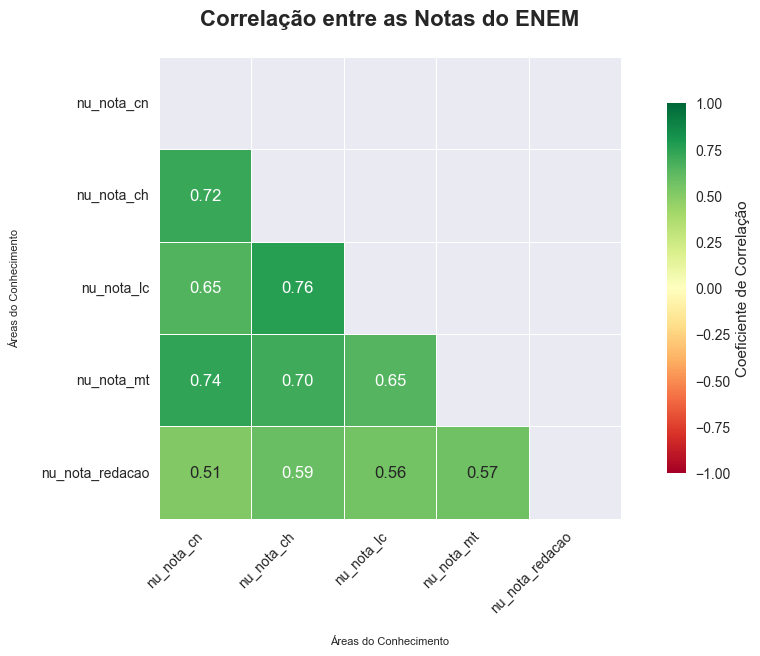

In [60]:
plt.figure(figsize=(12, 6))

plt.title(
    'Correlação entre as Notas do ENEM\n',
    fontsize=16,
    fontweight='bold'
)

# Criar máscara para mostrar apenas metade da matriz (opcional)
mask = np.triu(np.ones_like(df_modelado[colunas_notas].corr(), dtype=bool))

heatmap = sns.heatmap(
    df_modelado[colunas_notas].corr(),
    annot=True,
    cmap='RdYlGn',
    center=0,
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8, 'label': 'Coeficiente de Correlação'},
    fmt='.2f',
    annot_kws={'size': 12},
    mask=mask
)

# Melhorar os rótulos
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.xlabel('Áreas do Conhecimento', fontsize=8, labelpad=15)
plt.ylabel('Áreas do Conhecimento', fontsize=8, labelpad=15)

plt.grid(False)

# Ajustar layout
#plt.tight_layout()

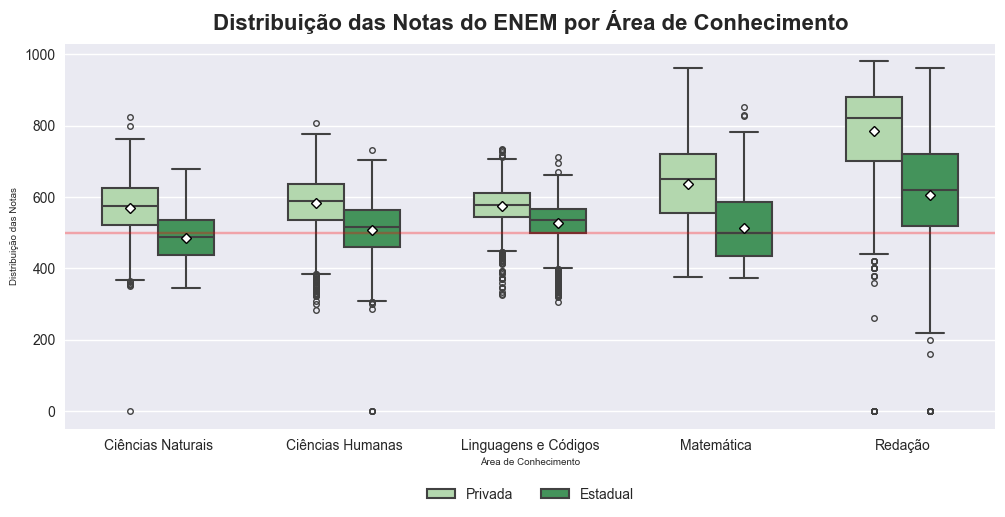

In [61]:
# Analise das Notas
analise_notas = (
    df_modelado[colunas_notas + ['tipo_adm_escola']]
    .melt(id_vars=['tipo_adm_escola'],
          value_vars=colunas_notas,
          var_name='prova',
          value_name='nota')
)

# Ajustar nomenclatura das provas
nomes_provas = {
    'nu_nota_cn': 'Ciências Naturais',
    'nu_nota_ch': 'Ciências Humanas',
    'nu_nota_lc': 'Linguagens e Códigos',
    'nu_nota_mt': 'Matemática',
    'nu_nota_redacao': 'Redação'
}
analise_notas['prova'] = analise_notas['prova'].map(nomes_provas)

# ordenar o boxplot
order_boxplot = (
    analise_notas
    .groupby(by='prova')
    .agg( mediana=('nota', 'median') )
    .sort_values(by='mediana')
    .index
)

plt.figure( figsize=(12, 5) )
plt.title('Distribuição das Notas do ENEM por Área de Conhecimento', fontsize=16, fontweight='bold', pad=10)

sns.boxplot(
    data=analise_notas,
    x='prova',
    y='nota',
    width=0.6,
    linewidth=1.5,
    fliersize=4,
    hue='tipo_adm_escola',
    legend=True,
    order=order_boxplot,
    showmeans=True,
    meanprops={
        'marker': 'D',
        'markerfacecolor': 'white',
        'markeredgecolor': 'black',
        'markersize': '5',
        'markeredgewidth': 1
    },
    palette='Greens'

)

plt.legend(bbox_to_anchor=(0.5, -0.12), loc='upper center', ncol=2)

# Adicionar linhas de referência
plt.axhline(y=500, color='red', linestyle='-', alpha=0.3, label='Nota 500')

# Labels
plt.ylabel('Distribuição das Notas', size=7)
plt.xlabel('Área de Conhecimento', size=7);

In [62]:
# Criar dataset comparativo Estadual vs Privada
df_comparativo = df_modelado[colunas_notas + ['tipo_adm_escola']]

# Calcular decis
for coluna in colunas_notas:
    df_comparativo[coluna+'_decil_geral'] = pd.qcut(
        df_comparativo[coluna],
        q=10,
        labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']
    )

# Separar por rede
df_estadual = df_comparativo[df_comparativo['tipo_adm_escola'] == 'Estadual']
df_privada = df_comparativo[df_comparativo['tipo_adm_escola'] == 'Privada']

df_estadual.shape, df_privada.shape

((2176, 11), (1988, 11))

Text(0.5, 36.72222222222221, 'Decis - Ciências da Natureza')

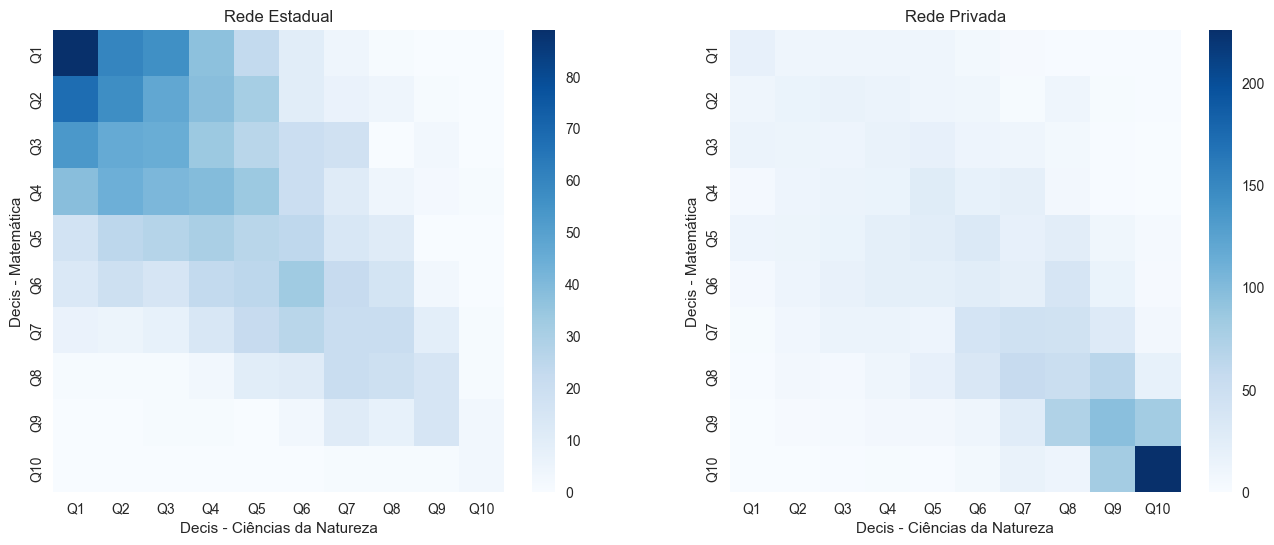

In [64]:
# Figura
Figura, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap Estadual
movimento_estadual = (
    df_estadual
    .groupby(['nu_nota_cn_decil_geral', 'nu_nota_mt_decil_geral'])
    .size()
    .unstack()
)

sns.heatmap(
    movimento_estadual,
    annot=False,
    fmt='d',
    cmap='Blues',
    ax=ax1
)
ax1.set_title('Rede Estadual')
ax1.set_ylabel('Decis - Matemática')
ax1.set_xlabel('Decis - Ciências da Natureza')

# Heatmap Privada
movimento_privada = (
    df_privada
    .groupby(['nu_nota_cn_decil_geral', 'nu_nota_mt_decil_geral'])
    .size()
    .unstack()
)
sns.heatmap(
    movimento_privada,
    annot=False,
    fmt='d',
    cmap='Blues',
    ax=ax2
)
ax2.set_title('Rede Privada')
ax2.set_ylabel('Decis - Matemática')
ax2.set_xlabel('Decis - Ciências da Natureza')

In [ ]:
import plotly as px

# Calcular a distribuição real dos seus dados
decis = [f'Q{loop}' for loop in range(1, 11)]
dados_reais = []

for decil in decis:

    total_decil = len(df_modelado[df_modelado['nu_nota_cn_quartil'] == decil])

    publico_decil = len(df_modelado[
        (df_modelado['nu_nota_cn_quartil'] == decil) &
        (df_modelado['tipo_adm_escola'] == 'Estadual')
    ])

    privado_decil = len(df_modelado[
        (df_modelado['nu_nota_cn_quartil'] == decil) &
        (df_modelado['tipo_adm_escola'] == 'Privada')
    ])

    # Calcular percentuais
    pct_publico = (publico_decil / total_decil * 100) if total_decil > 0 else 0
    pct_privado = (privado_decil / total_decil * 100) if total_decil > 0 else 0

    dados_reais.extend([
        {'decil': decil, 'rede': 'Pública', 'percentual': pct_publico},
        {'decil': decil, 'rede': 'Privada', 'percentual': pct_privado}
    ])

df_real = pd.DataFrame(dados_reais)
df_real.head()

,decil,rede,percentual
0,Q1,Pública,79.77
1,Q1,Privada,20.23
2,Q2,Pública,74.43
3,Q2,Privada,25.57
4,Q3,Pública,70.20


In [68]:
# Gráfico Funnel com dados reais
analise_funil = px.funnel(
    df_real,
    x='percentual',
    y='decil',
    color='rede',
    title='Distribuição por Decil: Pública vs Privada - Ciências da Natureza',
    width=950,
    height=600,
    color_discrete_map={'Pública': '#1f77b4', 'Privada': '#2ca02c'}
)

# Formatar números para inteiros
analise_funil.update_xaxes(tickformat='.0f')

# Mover legenda para inferior
analise_funil.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.2,
        xanchor='center',
        x=0.5
    )
)

analise_funil

In [69]:
def perfil_simples(notas_aluno):

    # Converter para números, tratando valores faltantes
    decis = []
    for q in notas_aluno:

        # Se faltar dado, considera baixo
        if pd.isna(q):
            decis.append(0)
        else:
            decis.append(int(str(q).replace('Q', '')))

    # Atribuir as notas
    cn, ch, lc, mt, red = decis

    # bom desempenho matematica
    if mt >= 8 and cn >= 7:
        return 'especialista matemática'

    # bom desempenho redação
    if red >= 8 and ch >= 7:
        return 'especialista redação'

    # aprovado em tudo
    if mt >= 7 and cn >= 7 and red >= 7 and ch >= 7:
        return 'bom desempenho'

    # deficit
    if mt <= 3 or cn <= 3 or red <= 3:
        return 'melhorar'

    return 'regular'

colunas_decis = ['nu_nota_cn_quartil', 'nu_nota_ch_quartil', 'nu_nota_lc_quartil', 'nu_nota_mt_quartil', 'nu_nota_redacao_quartil']
df_modelado['segmentacao_notas'] = df_modelado[colunas_decis].apply(perfil_simples, axis=1)

df_modelado['segmentacao_notas'].value_counts()

segmentacao_notas
melhorar                   2333
especialista matemática     882
regular                     700
especialista redação        233
bom desempenho               16
Name: count, dtype: int64

In [70]:
df_modelado[ df_modelado.segmentacao_notas == 'melhorar' ]

,no_municipio_esc,sg_uf_esc,tipo_adm_escola,tipo_local_escola,idiona_estrageiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,...,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao,nu_nota_cn_quartil,nu_nota_ch_quartil,nu_nota_lc_quartil,nu_nota_mt_quartil,nu_nota_redacao_quartil,segmentacao_notas
0,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,562.30,565.30,484.90,820.00,Q5,Q6,Q6,Q3,Q7,melhorar
6,Ribeirão Preto,SP,Privada,Urbana,Espanhol,1,1,1,1,1_sem_problemas,...,423.40,470.90,607.40,620.00,Q7,Q1,Q1,Q6,Q3,melhorar
8,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,438.20,534.50,464.90,360.00,Q4,Q2,Q4,Q3,Q1,melhorar
9,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,512.10,499.20,465.70,620.00,Q1,Q4,Q2,Q3,Q3,melhorar
10,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,592.60,551.80,489.30,780.00,Q5,Q7,Q5,Q3,Q6,melhorar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,504.90,533.20,549.20,720.00,Q3,Q3,Q4,Q5,Q5,melhorar
4152,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,470.30,444.10,420.70,520.00,Q5,Q2,Q1,Q2,Q2,melhorar
4153,Ribeirão Preto,SP,Estadual,Urbana,Inglês,0,0,0,0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,melhorar
4155,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,487.60,581.90,612.80,680.00,Q3,Q3,Q7,Q6,Q5,melhorar


In [71]:
# Explosão Solar
grafico = px.sunburst(
    df_modelado,
    path=['tipo_adm_escola', 'segmentacao_notas'],
    title='Distribuição de Perfis de Desempenho por Rede de Ensino',
    width=850,
    height=700,
    color='tipo_adm_escola',
    color_discrete_map={'Estadual': '#1f77b4', 'Privada': '#2ca02c'},
    hover_data={'segmentacao_notas': True}
)

grafico.update_traces(
    textinfo='label+percent parent',
    hovertemplate='<b>%{label}</b><br>Quantidade: %{value}<br>Percentual: %{percentParent}'
)

grafico.update_layout(
    font_size=14,
    title_x=0.5
)

In [72]:
# Ranking de cursos por prioridade
ranking_cursos = {
    '1_MEDICINA': 780,
    '2_ENGENHARIA_AEROESPACIAL': 770,
    '3_CIENCIA_COMPUTACAO': 740,
    '4_DIREITO': 750,
    '5_ENGENHARIA_CIVIL': 710,
    '6_PSICOLOGIA': 730,
    '7_ADMINISTRACAO': 720,
    '8_ARQUITETURA': 700,
    '9_ENFERMAGEM': 690,
    '10_NUTRICAO': 680
}

# Calcular média geral do aluno
df_modelado['media_geral'] = (
    df_modelado['nu_nota_cn'] +
    df_modelado['nu_nota_ch'] +
    df_modelado['nu_nota_lc'] +
    df_modelado['nu_nota_mt'] +
    df_modelado['nu_nota_redacao']
) / 5

# Função para encontrar o melhor curso possível
def encontrar_melhor_curso(media):
    for curso, nota_corte in ranking_cursos.items():
        if media >= nota_corte:
            return curso
    return 'NENHUM'

# Aplicar para cada aluno
df_modelado['curso_atingido'] = df_modelado['media_geral'].apply(encontrar_melhor_curso)

# Mostrar resultado
print('Distribuição de Cursos Atingidos:')
print(df_modelado['curso_atingido'].value_counts().sort_index())

Distribuição de Cursos Atingidos:
curso_atingido
10_NUTRICAO                   114
1_MEDICINA                     14
2_ENGENHARIA_AEROESPACIAL      10
3_CIENCIA_COMPUTACAO           79
5_ENGENHARIA_CIVIL            169
8_ARQUITETURA                  79
9_ENFERMAGEM                   98
NENHUM                       3601
Name: count, dtype: int64


In [73]:
df_modelado

,no_municipio_esc,sg_uf_esc,tipo_adm_escola,tipo_local_escola,idiona_estrageiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,...,nu_nota_mt,nu_nota_redacao,nu_nota_cn_quartil,nu_nota_ch_quartil,nu_nota_lc_quartil,nu_nota_mt_quartil,nu_nota_redacao_quartil,segmentacao_notas,media_geral,curso_atingido
0,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,484.90,820.00,Q5,Q6,Q6,Q3,Q7,melhorar,589.08,NENHUM
1,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,500.30,740.00,Q5,Q7,Q5,Q4,Q6,regular,578.74,NENHUM
2,Ribeirão Preto,SP,Estadual,Urbana,Espanhol,1,1,1,1,1_sem_problemas,...,664.50,700.00,Q6,Q5,Q4,Q8,Q5,regular,598.24,NENHUM
3,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,640.40,840.00,Q8,Q8,Q8,Q7,Q8,especialista redação,653.24,NENHUM
4,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,576.00,820.00,Q6,Q8,Q7,Q5,Q7,regular,626.42,NENHUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,Ribeirão Preto,SP,Estadual,Urbana,Espanhol,1,1,1,1,1_sem_problemas,...,615.50,680.00,Q8,Q9,Q10,Q6,Q5,regular,633.16,NENHUM
4160,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,800.40,840.00,Q9,Q8,Q10,Q10,Q8,especialista matemática,701.24,8_ARQUITETURA
4161,Ribeirão Preto,SP,Privada,Urbana,Espanhol,1,1,1,1,1_sem_problemas,...,607.60,660.00,Q4,Q3,Q6,Q6,Q4,regular,567.82,NENHUM
4162,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,568.80,760.00,Q8,Q6,Q6,Q5,Q6,regular,609.52,NENHUM


In [75]:
# Exportar para o gold
local_exportar_gold = '/Git_Clones/projeto-de-educacao-enem/1_ouro/'


df_modelado.to_parquet(
    path=local_exportar_gold+'dados_notas_segmentado.parquet.gzip',
    compression='gzip',
    index=False
)

## **3.Produto**

### **A. Modelagem dos dados dos participantes**

In [77]:
local = '/Git_Clones/projeto-de-educacao-enem/3_bronze/'
# Lendo o arquivo
arquivo_comprimido = 'df_participante_parquet.parquet.gzip'
df_participante = pd.read_parquet(local+arquivo_comprimido)
df_participante.shape

(4332944, 38)

In [78]:
# Filtrar a cidade
estado = 'SP'
cidade = 'Ribeirão Preto'

filtro_cidade_participante = (
    df_participante
    .loc[
        (df_participante['NO_MUNICIPIO_PROVA'] == cidade) &
        (df_participante['SG_UF_PROVA'] == estado)
    ]
)

filtro_cidade_participante.shape

(13548, 38)

In [79]:
### ### ### ### ### ### ### ### ### ### ### ### ### ###
# Dicionários simplificados para sociais
### ### ### ### ### ### ### ### ### ### ### ### ### ###

dicionario_faixa_etaria = {
    1: 'Menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: 'Entre 26 e 30 anos',
    12: 'Entre 31 e 35 anos',
    13: 'Entre 36 e 40 anos',
    14: 'Entre 41 e 45 anos',
    15: 'Entre 46 e 50 anos',
    16: 'Entre 51 e 55 anos',
    17: 'Entre 56 e 60 anos',
    18: 'Entre 61 e 65 anos',
    19: 'Entre 66 e 70 anos',
    20: 'Maior de 70 anos'
}

dicionario_sexo = {
    'M': 'Masculino',
    'F': 'Feminino'
}

dicionario_estado_civil = {
    0: 'Não informado',
    1: 'Solteiro(a)',
    2: 'Casado(a)/Companheiro(a)',
    3: 'Divorciado(a)/Separado(a)',
    4: 'Viúvo(a)'
}

dicionario_cor_raca = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
    6: 'Não dispõe da informação'
}

dicionario_nacionalidade = {
    0: 'Não informado',
    1: 'Brasileiro(a)',
    2: 'Brasileiro(a) Naturalizado(a)',
    3: 'Estrangeiro(a)',
    4: 'Brasileiro(a) Nato(a) nascido(a) no exterior'
}

dicionario_conclusao_em = {
    1: 'Já concluiu o Ensino Médio',
    2: 'Concluirá em 2024',
    3: 'Concluirá após 2024',
    4: 'Não concluiu e não está cursando'
}

dicionario_ano_conclusao = {
    0: 'Não informado',
    1: '2023',
    2: '2022',
    3: '2021',
    4: '2020',
    5: '2019',
    6: '2018',
    7: '2017',
    8: '2016',
    9: '2015',
    10: '2014',
    11: '2013',
    12: '2012',
    13: '2011',
    14: '2010',
    15: '2009',
    16: '2008',
    17: '2007',
    18: 'Antes de 2007'
}

dicionario_tipo_ensino = {
    1: 'Ensino Regular',
    2: 'Educação Especial - Modalidade Substitutiva'
}

dicionario_treineiro = {
    1: 'Sim',
    0: 'Não'
}

filtro_cidade_participante['faixa_etaria'] = filtro_cidade_participante.TP_FAIXA_ETARIA.map(dicionario_faixa_etaria)
filtro_cidade_participante['sexo'] = filtro_cidade_participante.TP_SEXO.map(dicionario_sexo)
filtro_cidade_participante['estado_civil'] = filtro_cidade_participante.TP_ESTADO_CIVIL.map(dicionario_estado_civil)
filtro_cidade_participante['cor_raca'] = filtro_cidade_participante.TP_COR_RACA.map(dicionario_cor_raca)
filtro_cidade_participante['nacionalidade'] = filtro_cidade_participante.TP_NACIONALIDADE.map(dicionario_nacionalidade)
filtro_cidade_participante['situacao_em'] = filtro_cidade_participante.TP_ST_CONCLUSAO.map(dicionario_conclusao_em)
filtro_cidade_participante['ano_conclusao_em'] = filtro_cidade_participante.TP_ANO_CONCLUIU.map(dicionario_ano_conclusao)
filtro_cidade_participante['tipo_ensino'] = filtro_cidade_participante.TP_ENSINO.map(dicionario_tipo_ensino)
filtro_cidade_participante['treineiro'] = filtro_cidade_participante.IN_TREINEIRO.map(dicionario_treineiro)

In [80]:
### ### ### ### ### ### ### ### ### ### ### ### ### ###
# Dicionários simplificados para as questões Q001–Q023
### ### ### ### ### ### ### ### ### ### ### ### ### ###

dicionario_q001_pai_escolaridade = {
    'A': 'Nunca estudou',
    'B': 'Até 4º ano do Fundamental',
    'C': 'Até 8º ano do Fundamental',
    'D': 'Até o Ensino Médio',
    'E': 'Ensino Médio completo',
    'F': 'Faculdade incompleta',
    'G': 'Pós-graduação',
    'H': 'Não sei'
}

dicionario_q002_mae_escolaridade = dicionario_q001_pai_escolaridade

dicionario_q003_ocup_pai = {
    'A': 'Grupo 1 - Agricultura / serviços gerais',
    'B': 'Grupo 2 - Serviços / comércio',
    'C': 'Grupo 3 - Indústria / transporte',
    'D': 'Grupo 4 - Técnicos / autônomos',
    'E': 'Grupo 5 - Profissionais de nível superior',
    'F': 'Não sei'
}

dicionario_q004_ocup_mae = dicionario_q003_ocup_pai

dicionario_q005_residentes = {
    i: f'{i} pessoa(s)' for i in range(1, 21)
}

dicionario_q006_renda = {
    'A': 'Não',
    'B': 'Sim'
}

faixas_renda = {
      'A': 'Nenhuma Renda',
      'B': 'Até R$ 1.412',
      'C': 'R$ 1.412 a R$ 2.118',
      'D': 'R$ 2.118 a R$ 2.824',
      'E': 'R$ 2.824 a R$ 3.530',
      'F': 'R$ 3.530 a R$ 4.236',
      'G': 'R$ 4.236 a R$ 5.648',
      'H': 'R$ 5.648 a R$ 7.060',
      'I': 'R$ 7.060 a R$ 8.472',
      'J': 'R$ 8.472 a R$ 9.884',
      'K': 'R$ 9.884 a R$ 11.296',
      'L': 'R$ 11.296 a R$ 12.708',
      'M': 'R$ 12.708 a R$ 14.120',
      'N': 'R$ 14.120 a R$ 16.944',
      'O': 'R$ 16.944 a R$ 21.180',
      'P': 'R$ 21.180 a R$ 28.240',
      'Q': 'Acima de R$ 28.240'
    }

# R$ 1.412,00
faixa_renda_sm = {
    'A': '0 SM',
    'B': 'Até 1 SM',
    'C': '1 a 1.5 SM',
    'D': '1.5 a 2 SM',
    'E': '2 a 2.5 SM',
    'F': '2.5 a 3 SM',
    'G': '3 a 4 SM',
    'H': '4 a 5 SM',
    'I': '5 a 6 SM',
    'J': '6 a 7 SM',
    'K': '7 a 8 SM',
    'L': '8 a 9 SM',
    'M': '9 a 10 SM',
    'N': '10 a 12 SM',
    'O': '12 a 15 SM',
    'P': '15 a 20 SM',
    'Q': 'Acima de 20 SM'
}

"""
Baseado na classificação ABEP 2024:
A1/A2: Alta renda (acima de 10 SM)
B1/B2: Média alta (5-10 SM)
C1/C2: Média baixa (2-5 SM)
D: Baixa renda (1-2 SM)
E: Pobreza (até 1 SM)
"""

classe_social = {
    'A': 'Classe E',
    'B': 'Classe D',
    'C': 'Classe D',
    'D': 'Classe C2',
    'E': 'Classe C2',
    'F': 'Classe C1',
    'G': 'Classe C1',
    'H': 'Classe C1',
    'I': 'Classe B2',
    'J': 'Classe B2',
    'K': 'Classe B1',
    'L': 'Classe B1',
    'M': 'Classe A2',
    'N': 'Classe A2',
    'O': 'Classe A1',
    'P': 'Classe A1',
    'Q': 'Classe A1'
}

dicionario_q007_faixa_renda = {
    'A': '1.Nenhuma_renda',
    'B': '2.Até_1412',
    'C': '3.1412_a_2118',
    'D': '4.2118_a_2824',
    'E': '5.2824_a_3530',
    'F': '6.3530_a_4236',
    'G': '7.4236_a_5648',
    'H': '8.5648_a_7060',
    'I': '9.7060_a_8472',
    'J': '10.8472_a_9884',
    'K': '11.9884_a_11296',
    'L': '12.11296_a_12708',
    'M': '13.12708_a_14120',
    'N': '14.14120_a_16944',
    'O': '15.16944_a_21180',
    'P': '16.21180_a_28240',
    'Q': '17.Acima_de_28240'
}

dicionario_q008_domestico = {
    'A': 'Não',
    'B': '1–2 dias/semana',
    'C': '3–4 dias/semana',
    'D': '5 ou mais dias/semana'
}

dicionario_q009_banheiro = {
    'A': 'Não',
    'B': '1',
    'C': '2',
    'D': '3 ou mais'
}

dicionario_q010_quarto = dicionario_q009_banheiro
dicionario_q011_carro = dicionario_q009_banheiro
dicionario_q012_moto = dicionario_q009_banheiro
dicionario_q013_geladeira = dicionario_q009_banheiro

dicionario_q014_freezer = {'A': 'Não', 'B': 'Sim'}
dicionario_q015_maquina = {'A': 'Não', 'B': 'Sim'}
dicionario_q016_microondas = {'A': 'Não', 'B': 'Sim'}
dicionario_q017_aspirador = {'A': 'Não', 'B': 'Sim'}
dicionario_q018_tv = dicionario_q009_banheiro
dicionario_q019_tv_assinatura = {'A': 'Não', 'B': 'Sim'}
dicionario_q020_internet = {'A': 'Não', 'B': 'Sim'}

dicionario_q021_computador = {
    'A': 'Não',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4 ou mais'
}

dicionario_q022_celular = {
    'A': 'Não',
    'B': '1',
    'C': '2',
    'D': '3 ou mais',
    'E': '4 ou mais'
}

dicionario_q023_tipo_escola = {
    'A': 'Somente pública',
    'B': 'Pública + Privada (sem bolsa)',
    'C': 'Pública + Privada (bolsa integral)',
    'D': 'Somente privada (sem bolsa)',
    'E': 'Somente privada (bolsa integral)',
    'F': 'Não cursou EM'
}


filtro_cidade_participante['pai_escolaridade'] = filtro_cidade_participante.Q001.map(dicionario_q001_pai_escolaridade)
filtro_cidade_participante['mae_escolaridade'] = filtro_cidade_participante.Q002.map(dicionario_q002_mae_escolaridade)
filtro_cidade_participante['ocupacao_pai'] = filtro_cidade_participante.Q003.map(dicionario_q003_ocup_pai)
filtro_cidade_participante['ocupacao_mae'] = filtro_cidade_participante.Q004.map(dicionario_q004_ocup_mae)
filtro_cidade_participante['n_residentes'] = filtro_cidade_participante.Q005.map(dicionario_q005_residentes)

filtro_cidade_participante['possui_renda'] = filtro_cidade_participante.Q006.map(dicionario_q006_renda)
filtro_cidade_participante['faixa_renda'] = filtro_cidade_participante.Q007.map(dicionario_q007_faixa_renda)
filtro_cidade_participante['faixa_renda_sm'] = filtro_cidade_participante.Q007.map(faixa_renda_sm)
filtro_cidade_participante['faixa_renda_social'] = filtro_cidade_participante.Q007.map(classe_social)

filtro_cidade_participante['empregado_domestico'] = filtro_cidade_participante.Q008.map(dicionario_q008_domestico)
filtro_cidade_participante['banheiro'] = filtro_cidade_participante.Q009.map(dicionario_q009_banheiro)
filtro_cidade_participante['quarto'] = filtro_cidade_participante.Q010.map(dicionario_q010_quarto)
filtro_cidade_participante['carro'] = filtro_cidade_participante.Q011.map(dicionario_q011_carro)
filtro_cidade_participante['moto'] = filtro_cidade_participante.Q012.map(dicionario_q012_moto)
filtro_cidade_participante['geladeira'] = filtro_cidade_participante.Q013.map(dicionario_q013_geladeira)
filtro_cidade_participante['freezer'] = filtro_cidade_participante.Q014.map(dicionario_q014_freezer)
filtro_cidade_participante['maquina_lavar'] = filtro_cidade_participante.Q015.map(dicionario_q015_maquina)
filtro_cidade_participante['microondas'] = filtro_cidade_participante.Q016.map(dicionario_q016_microondas)
filtro_cidade_participante['aspirador'] = filtro_cidade_participante.Q017.map(dicionario_q017_aspirador)
filtro_cidade_participante['tv'] = filtro_cidade_participante.Q018.map(dicionario_q018_tv)
filtro_cidade_participante['tv_assinatura'] = filtro_cidade_participante.Q019.map(dicionario_q019_tv_assinatura)
filtro_cidade_participante['internet'] = filtro_cidade_participante.Q020.map(dicionario_q020_internet)
filtro_cidade_participante['computador'] = filtro_cidade_participante.Q021.map(dicionario_q021_computador)
filtro_cidade_participante['celular'] = filtro_cidade_participante.Q022.map(dicionario_q022_celular)
filtro_cidade_participante['tipo_escola'] = filtro_cidade_participante.Q023.map(dicionario_q023_tipo_escola)

background familiar, associação de ter uma mãe e o desempenho dos alunos. teste de consistência. índice socioeconômico do aluno. senso da educação básica. senso do ensino superior.

In [81]:
# Verificando o tipo das escolas
filtro_cidade_participante['tipo_escola'].value_counts().to_dict()

{'Somente pública': 6860,
 'Somente privada (sem bolsa)': 4670,
 'Somente privada (bolsa integral)': 1192,
 'Pública + Privada (sem bolsa)': 487,
 'Pública + Privada (bolsa integral)': 316,
 'Não cursou EM': 23}

In [82]:
# Ajustar a nomenclatura do tipo da escola
dicionario_chave_prox = {
  'Somente pública': 'Estadual',
  'Somente privada (sem bolsa)': 'Privada',
  'Somente privada (bolsa integral)': 'Privada',
  'Pública + Privada (sem bolsa)': 'Meio',
  'Pública + Privada (bolsa integral)': 'Meio',
  'Não cursou EM': 'Nao_cursou_EM'
}

filtro_cidade_participante['chave_prox'] = filtro_cidade_participante.tipo_escola.map(dicionario_chave_prox)
filtro_cidade_participante['chave_prox'].value_counts()

chave_prox
Estadual         6860
Privada          5862
Meio              803
Nao_cursou_EM      23
Name: count, dtype: int64

In [83]:
# Analise de Classe
anl_faixa_renda = (
    filtro_cidade_participante
    .groupby(by=['chave_prox', 'faixa_renda_social'])
    .agg(
        quantidade = ('chave_prox', 'count')
     )
    .reset_index()
    .pivot_table(
        index='chave_prox',
        columns='faixa_renda_social',
        values='quantidade'
    )
)
anl_faixa_renda = anl_faixa_renda.div(anl_faixa_renda.sum(axis=1), axis=0)
anl_faixa_renda

faixa_renda_social,Classe A1,Classe A2,Classe B1,Classe B2,Classe C1,Classe C2,Classe D,Classe E
chave_prox,,,,,,,,
Estadual,0.01,0.01,0.01,0.03,0.22,0.27,0.43,0.03
Meio,0.03,0.02,0.06,0.08,0.30,0.22,0.26,0.01
Nao_cursou_EM,0.09,0.04,NaN,0.04,0.35,0.04,0.30,0.13
Privada,0.22,0.10,0.11,0.11,0.28,0.10,0.07,0.01


In [84]:
# Poderia verificar questões mais interperssoais e economicas
filtro_cidade_participante['pai_escolaridade'].value_counts()

pai_escolaridade
Ensino Médio completo        4188
Faculdade incompleta         2284
Pós-graduação                1944
Até o Ensino Médio           1609
Até 4º ano do Fundamental    1147
Até 8º ano do Fundamental    1145
Não sei                      1045
Nunca estudou                 186
Name: count, dtype: int64

### **B. Cruzamento**

Vamos fazer um proxy da base para dar mais contexto e trazer analises estatísticas


In [86]:
# Exportar para o gold
local_base_gold = '/Git_Clones/projeto-de-educacao-enem/1_ouro/'

df_modelado = pd.read_parquet(local_base_gold+'dados_notas_segmentado.parquet.gzip')
df_modelado['curso_atingido'] = df_modelado['curso_atingido'].apply( lambda loop : loop.lower() )

df_modelado.head()

,no_municipio_esc,sg_uf_esc,tipo_adm_escola,tipo_local_escola,idiona_estrageiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,...,nu_nota_mt,nu_nota_redacao,nu_nota_cn_quartil,nu_nota_ch_quartil,nu_nota_lc_quartil,nu_nota_mt_quartil,nu_nota_redacao_quartil,segmentacao_notas,media_geral,curso_atingido
0,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,484.90,820.00,Q5,Q6,Q6,Q3,Q7,melhorar,589.08,nenhum
1,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,500.30,740.00,Q5,Q7,Q5,Q4,Q6,regular,578.74,nenhum
2,Ribeirão Preto,SP,Estadual,Urbana,Espanhol,1,1,1,1,1_sem_problemas,...,664.50,700.00,Q6,Q5,Q4,Q8,Q5,regular,598.24,nenhum
3,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,640.40,840.00,Q8,Q8,Q8,Q7,Q8,especialista redação,653.24,nenhum
4,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,576.00,820.00,Q6,Q8,Q7,Q5,Q7,regular,626.42,nenhum


In [87]:
anl_faixa_renda.reset_index()

faixa_renda_social,chave_prox,Classe A1,Classe A2,Classe B1,Classe B2,Classe C1,Classe C2,Classe D,Classe E
0,Estadual,0.01,0.01,0.01,0.03,0.22,0.27,0.43,0.03
1,Meio,0.03,0.02,0.06,0.08,0.30,0.22,0.26,0.01
2,Nao_cursou_EM,0.09,0.04,NaN,0.04,0.35,0.04,0.30,0.13
3,Privada,0.22,0.10,0.11,0.11,0.28,0.10,0.07,0.01


In [88]:
# Dados
tab_final = pd.merge(
    df_modelado,
    anl_faixa_renda.reset_index(),
    left_on='tipo_adm_escola',
    right_on='chave_prox',
    how='left'
)

tab_final

,no_municipio_esc,sg_uf_esc,tipo_adm_escola,tipo_local_escola,idiona_estrageiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,...,curso_atingido,chave_prox,Classe A1,Classe A2,Classe B1,Classe B2,Classe C1,Classe C2,Classe D,Classe E
0,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,nenhum,Privada,0.22,0.10,0.11,0.11,0.28,0.10,0.07,0.01
1,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,nenhum,Estadual,0.01,0.01,0.01,0.03,0.22,0.27,0.43,0.03
2,Ribeirão Preto,SP,Estadual,Urbana,Espanhol,1,1,1,1,1_sem_problemas,...,nenhum,Estadual,0.01,0.01,0.01,0.03,0.22,0.27,0.43,0.03
3,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,nenhum,Privada,0.22,0.10,0.11,0.11,0.28,0.10,0.07,0.01
4,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,nenhum,Estadual,0.01,0.01,0.01,0.03,0.22,0.27,0.43,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,Ribeirão Preto,SP,Estadual,Urbana,Espanhol,1,1,1,1,1_sem_problemas,...,nenhum,Estadual,0.01,0.01,0.01,0.03,0.22,0.27,0.43,0.03
4160,Ribeirão Preto,SP,Privada,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,8_arquitetura,Privada,0.22,0.10,0.11,0.11,0.28,0.10,0.07,0.01
4161,Ribeirão Preto,SP,Privada,Urbana,Espanhol,1,1,1,1,1_sem_problemas,...,nenhum,Privada,0.22,0.10,0.11,0.11,0.28,0.10,0.07,0.01
4162,Ribeirão Preto,SP,Estadual,Urbana,Inglês,1,1,1,1,1_sem_problemas,...,nenhum,Estadual,0.01,0.01,0.01,0.03,0.22,0.27,0.43,0.03


### **C. Análise Final**

In [90]:
# Ler a base da camada bronze
local_base  = '/Git_Clones/projeto-de-educacao-enem/3_bronze/df_resultado_parquet.parquet.gzip'
df_local = pd.read_parquet( local_base )

In [91]:
# Modelagem

# Filtrar a cidade
estado = 'SP'
cidade = 'Ribeirão Preto'

filtro_cidade = (
    df_local
    .loc[
        (df_local['NO_MUNICIPIO_PROVA'] == cidade) &
        (df_local['SG_UF_PROVA'] == estado)
    ]
)

# Colunas em minuscula
filtro_cidade.columns = [ loop.lower() for loop in filtro_cidade.columns ]

# Ajustar tipo da escola
dicionario_adm_escola = {
    1:'Federal',
    2:'Estadual',
    3:'Municipal',
    4:'Privada'
}
filtro_cidade['tipo_adm_escola'] = filtro_cidade.tp_dependencia_adm_esc.map(dicionario_adm_escola)

# Shape
filtro_cidade.shape

(13548, 43)

In [92]:
colunas_analise = ['co_escola', 'tipo_adm_escola', 'nu_nota_cn', 'nu_nota_ch', 'nu_nota_lc', 'nu_nota_mt', 'nu_nota_redacao']

In [93]:
colunas_analise[-5:]

['nu_nota_cn', 'nu_nota_ch', 'nu_nota_lc', 'nu_nota_mt', 'nu_nota_redacao']

In [94]:
# Selecionar as colunas da analise
df_analise = (
    filtro_cidade[colunas_analise]
    .reset_index(drop=True)
)

# Cria um identificador concatenando o código e o tipo
df_analise['escola_label'] = df_analise['co_escola'].astype(str) + ' - ' + df_analise['tipo_adm_escola']

# Calcula média geral para ordenar
df_analise['media_geral_calc'] = df_analise[colunas_analise[-5:]].mean(axis=1)

df_analise

,co_escola,tipo_adm_escola,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao,escola_label,media_geral_calc
0,35114728.00,Privada,512.90,562.30,565.30,484.90,820.00,35114728.0 - Privada,589.08
1,35024272.00,Estadual,448.00,320.20,363.40,396.60,620.00,35024272.0 - Estadual,429.64
2,35024065.00,Estadual,520.90,575.60,556.90,500.30,740.00,35024065.0 - Estadual,578.74
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,510.30,393.80,554.60,421.10,680.00,NaN,511.96
...,...,...,...,...,...,...,...,...,...
13543,NaN,NaN,538.80,548.10,515.10,461.50,620.00,NaN,536.70
13544,NaN,NaN,517.10,551.00,577.90,581.40,900.00,NaN,625.48
13545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13546,NaN,NaN,608.80,617.80,630.80,741.50,840.00,NaN,687.78


In [95]:
# Analise
heatmap_df = (
    df_analise
    .groupby(by='escola_label')
    .agg(
        media_geral = ('media_geral_calc', 'mean'),
        media_cn = ('nu_nota_cn', 'mean'),
        media_ch = ('nu_nota_ch', 'mean'),
        media_lc = ('nu_nota_lc', 'mean'),
        media_mt = ('nu_nota_mt', 'mean'),
        media_redacao = ('nu_nota_redacao', 'mean')
        )
    .sort_values(by='media_geral', ascending=False)
    .drop(columns='media_geral')
    .dropna()
)

heatmap_df = heatmap_df.rename(columns={
    'nota_cn': 'Ciências da Natureza',
    'nota_ch': 'Ciências Humanas',
    'nota_lc': 'Linguagens',
    'nota_mt': 'Matemática',
    'nota_redacao': 'Redação'
})

heatmap_df

,media_cn,media_ch,media_lc,media_mt,media_redacao
escola_label,,,,,
52097587.0 - Privada,645.10,681.00,643.00,830.60,920.00
35290804.0 - Privada,643.93,660.36,621.52,754.33,903.18
35923710.0 - Federal,666.35,651.10,630.65,833.70,770.00
60020722.0 - Privada,669.60,674.00,636.80,817.10,700.00
35449003.0 - Privada,623.76,642.94,615.51,723.70,859.53
...,...,...,...,...,...
35049612.0 - Estadual,450.72,467.17,505.22,458.68,480.00
35023899.0 - Estadual,465.83,464.30,501.27,459.94,425.71
35907911.0 - Estadual,427.30,496.60,445.50,413.35,530.00


In [96]:
# Gráfico final
grafico_final = px.imshow(
    heatmap_df,
    color_continuous_scale='YlGnBu',
    zmin=400, zmax=850,
    aspect='auto',
    labels=dict(color='Nota'),
    title='Mapa de Calor — Desempenho das Escolas no ENEM 2024 (Ribeirão Preto)'
)

# Move o label superior para dar respiro ao título
grafico_final.update_xaxes(
    title='Área do Conhecimento',
    side='top',
    title_standoff=5  # distância entre título do eixo e gráfico
)

# Mantém ordem natural das escolas
grafico_final.update_yaxes(
    title='Escola (Código + Tipo)',
    autorange='reversed'
)

# Layout geral e colorbar mais compacta
grafico_final.update_layout(
    font=dict(size=11),
    title_x=0.5,
    margin=dict(l=80, r=20, t=90, b=40),  # margem superior maior
    width=1000,
    height=850,
    coloraxis_colorbar=dict(
        title='Média da Prova',
        tickvals=[400, 500, 600, 700, 800],
        thickness=12,       # 🔹 reduz largura da barra
        len=0.5,            # 🔹 reduz altura da barra
        yanchor='middle',
        y=0.5
    )
)

# Ajustar as cores no heatmap
grafico_final.update_traces(zsmooth='best', opacity=0.95)

grafico_final.show()

## **4. O que você levaria para o Executivo?**

De tudo que criamos, quais analisem seria interessante levar para o Secretario de Educação?